Connect to Astra DB

In [69]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from config import astra_client_id, astra_client_secret, astra_app_name

# Astra DB Configuration
ASTRA_DB_CLIENT_ID = astra_client_id
ASTRA_DB_CLIENT_SECRET = astra_client_secret
ASTRA_DB_SECURE_CONNECT_BUNDLE_PATH = "secure-connect-datathon.zip"

# Connect to Astra DB
def connect_to_astra():
    try:
        # Set up the authentication provider with your secure connect bundle
        auth_provider = PlainTextAuthProvider(ASTRA_DB_CLIENT_ID, ASTRA_DB_CLIENT_SECRET)
        cluster = Cluster(cloud={'secure_connect_bundle': ASTRA_DB_SECURE_CONNECT_BUNDLE_PATH}, auth_provider=auth_provider)
        
        # Connect to the cluster
        session = cluster.connect()
        
        session.set_keyspace(astra_app_name)
        
        print("Connected to Astra DB successfully!")
        return session
    
    except Exception as e:
        print(f"Failed to connect to Astra DB: {e}")
        return None

# Initialize connection
session = connect_to_astra()

# Test the connection
if session:
    rows = session.execute('SELECT release_version FROM system.local')
    for row in rows:
        print(f"Cassandra release version: {row.release_version}")

Connected to Astra DB successfully!
Cassandra release version: 4.0.11-0fb517339e3c


Display Tables

In [167]:
import pandas as pd

# Set pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)       # Adjust the display width to show all columns in the same row
pd.set_option('display.max_colwidth', None)  # Show full content of each column

# Function to fetch data from a table in Astra DB and return as a Pandas DataFrame
def fetch_table_to_dataframe(session, table_name):
    try:
        query = f"SELECT * FROM {table_name};"
        rows = session.execute(query)
        columns = rows.column_names
        data = [row._asdict() for row in rows]
        df = pd.DataFrame(data, columns=columns)
        return df
    except Exception as e:
        print(f"Error fetching data from {table_name}: {e}")
        return pd.DataFrame()

# List of table names in your database
table_names = ["customers", "events", "bookings", "customer_preferences", "engagements", 
            "campaigns", "retentions", "revenues"]

# Fetch data from each table and display the results
for table_name in table_names:
    print(f"Fetching data from table: {table_name}")
    df = fetch_table_to_dataframe(session, table_name)
    
    # Display table information
    print(f"Table: {table_name}")
    print(f"Number of rows: {len(df)}")
    print(f"Head of the table:")
    display(df.head())
    print("-" * 50)

Fetching data from table: customers
Table: customers
Number of rows: 200
Head of the table:


,customer_id,age,conversion_rate,device_type,email,family_status,first_name,gender,join_date,last_name,location,phone_number
0,da077a0d-52e5-4636-824e-26df6a9e1a2b,36,0.128424,Mac,olivia.johnson410@gmail.com,With Kids,Olivia,Male,2023-01-13 11:17:55.692,Johnson,Berlin,+17356571340
1,83c45405-fa52-4a67-9dae-9f02bb8b7feb,29,0.214491,Windows,noah.miller603@gmail.com,Married,Noah,Non-binary,2024-06-24 11:17:55.692,Miller,Tokyo,+14466401311
2,800e76b2-1dd5-419b-98ad-6b7cdbc5561b,36,0.186365,iOS,sophia.smith247@gmail.com,With Kids,Sophia,Non-binary,2023-12-24 11:17:55.692,Smith,New York,+17313167687
3,c42b5601-bbe4-4132-969c-a0f5fb7006e3,63,0.333155,Mac,sophia.miller753@gmail.com,With Kids,Sophia,Non-binary,2023-01-28 11:17:55.692,Miller,London,+14490715506
4,3f000102-eb5d-46f4-b666-f109ec1c4ea7,62,0.169720,Windows,emma.johnson783@gmail.com,Single,Emma,Male,2023-02-08 11:17:55.692,Johnson,New York,+13681728120


--------------------------------------------------
Fetching data from table: events
Table: events
Number of rows: 50
Head of the table:


,event_id,avg_rating,capacity_utilization,end_date,event_description,event_name,event_type,location,max_capacity,start_date,status
0,5c57bcab-b77c-4a0f-8e06-d3f75c547ce5,3.9,28.361266,2025-02-22 14:17:55.700,Description for Space VR Adventure 50,Space VR Adventure 50,Adventure,Space Station,179,2025-02-22 11:17:55.700,Active
1,bb4d16ff-e6e4-40d9-bbde-8e20d1163712,4.1,12.511416,2025-02-26 15:17:55.700,Description for Zero-G Dance 35,Zero-G Dance 35,Adventure,Mars,438,2025-02-26 11:17:55.700,Active
2,c8892b46-cd1e-4a0b-ae9a-ea1ee5490cb7,4.6,7.179487,2025-03-05 14:17:55.699,Description for Zero-G Dance 94,Zero-G Dance 94,Adventure,Orbital Colony,260,2025-03-05 11:17:55.699,Active
3,b8c7e83d-5375-44ca-a436-e38c941ff1b0,3.9,49.313725,2025-02-15 13:17:55.700,Description for Martian Concert 74,Martian Concert 74,Romance,Orbital Colony,340,2025-02-15 11:17:55.700,Active
4,d2d25ff2-f93f-436f-89eb-50518b407922,4.2,22.904911,2025-03-09 15:17:55.700,Description for Zero-G Dance 78,Zero-G Dance 78,Romance,Mars,319,2025-03-09 11:17:55.700,Active


--------------------------------------------------
Fetching data from table: bookings
Table: bookings
Number of rows: 500
Head of the table:


,booking_id,booking_channel,booking_date,ctr,customer_id,event_date,event_id,number_of_guests,total_spend,upsells
0,2004759c-54f3-4e7a-a2a8-106252ada83d,mobile app,2025-01-17 11:17:55.717,0.201514,7cbd133c-c088-4ed5-9d08-678313c864ad,2025-03-02 11:17:55.717,a649e115-c784-468e-8008-e38916752f0b,2,891.59,None
1,ca5f2b6d-827c-40da-9909-13acf23ce07d,website,2025-01-21 11:17:55.717,0.249746,ca99a9ae-9e27-4bcf-bfb5-f913459b41ae,2025-02-06 11:17:55.717,e53b0301-3650-404d-8049-f375bc769795,4,779.47,"Transportation Service, Merchandise, Exclusive Access"
2,eea274ee-76c2-483c-a3f9-c69deb971834,website,2025-01-21 11:17:55.717,0.115885,c7dc187e-82d5-466c-aaff-20ae41487ff2,2025-03-20 11:17:55.717,3904bc44-24bf-4ed2-902d-6f8c027cf185,2,194.77,Meal Package
3,0484db85-9967-46b8-bf26-1cda052ba6ff,website,2025-01-13 11:17:55.717,0.179010,e7e56d86-f30e-4cd0-9ce2-e75b9f832fc6,2025-03-05 11:17:55.717,45403584-aceb-44e0-b245-8ac268e7d32d,4,630.01,None
4,b8e6b4b8-840f-4ff0-9df7-a271495650b3,mobile app,2025-01-26 11:17:55.716,0.086884,57a02cdf-b2b6-49d8-b5d8-da87f98a1d75,2025-03-08 11:17:55.716,e53b0301-3650-404d-8049-f375bc769795,4,189.87,None


--------------------------------------------------
Fetching data from table: customer_preferences
Table: customer_preferences
Number of rows: 200
Head of the table:


,customer_id,preferred_activities,preferred_event_types,upsell_preferences
0,da077a0d-52e5-4636-824e-26df6a9e1a2b,[Adventure at Moon],[Adventure],"[Photo Package, Fast Pass]"
1,83c45405-fa52-4a67-9dae-9f02bb8b7feb,[Luxury at Space Station],[Luxury],[Meal Package]
2,800e76b2-1dd5-419b-98ad-6b7cdbc5561b,[Educational at Mars],[Educational],[Meal Package]
3,c42b5601-bbe4-4132-969c-a0f5fb7006e3,[Educational at Space Station],[Educational],"[Transportation Service, VIP Seating, Photo Package]"
4,3f000102-eb5d-46f4-b666-f109ec1c4ea7,[Romance at Orbital Colony],[Romance],"[VIP Seating, Transportation Service, Merchandise]"


--------------------------------------------------
Fetching data from table: engagements
Table: engagements
Number of rows: 500
Head of the table:


,engagement_id,clicks,customer_id,engagement_date,event_id,purchases
0,02e659c4-6bd1-45f7-85ee-ac8533bd782e,35,f855762c-46cb-4c5b-beaa-ae0e4d4c17c3,2025-01-07 11:17:55.726,3904bc44-24bf-4ed2-902d-6f8c027cf185,9
1,0a90739b-4e34-48b4-bda4-52b9d031a0cd,46,b4fd05fe-ea5d-4fed-a14a-5f016cb8c919,2025-01-17 11:17:55.726,7988902b-3c6f-4302-96df-f8d2e70487eb,11
2,f702b24f-585d-4be3-b197-7f71f383fc2b,29,1ec9d33f-f377-496e-bf74-adaa11fa0f80,2025-01-26 11:17:55.734,fd8a3216-2366-44cd-99dd-7750452ccf44,3
3,c89c5441-e05f-464c-aec5-340d0ab52e80,12,02abd2aa-4cc0-45ab-ab9e-c0b062926874,2025-01-05 11:17:55.733,45403584-aceb-44e0-b245-8ac268e7d32d,4
4,efe9c749-f47b-462c-88bb-c944dee17181,7,d38a76d1-5613-43e4-bd51-6dd9b5f5ff14,2025-01-05 11:17:55.726,15c9ab61-4146-499e-ab7e-16a9f2a77ccd,0


--------------------------------------------------
Fetching data from table: campaigns
Table: campaigns
Number of rows: 50
Head of the table:


,campaign_id,ad_spend,ctr,end_date,event_id,impressions,roi,start_date
0,07adda58-4bae-4a24-9482-7c6f6753afd1,2945.87,0.103644,2024-12-28 11:17:55.724,2186e898-b20b-48f2-b3d3-e6fcec1ddd9d,66005,1.684921,2024-12-24 11:17:55.724
1,9fc38935-8a96-49f7-8942-68763c3cc13d,1674.21,0.227358,2024-12-24 11:17:55.726,45403584-aceb-44e0-b245-8ac268e7d32d,40457,2.997483,2024-12-20 11:17:55.726
2,fc1e9743-165a-4e0e-b172-8bdb79c51aca,3731.08,0.074047,2025-01-07 11:17:55.725,2186e898-b20b-48f2-b3d3-e6fcec1ddd9d,74722,2.838551,2024-12-29 11:17:55.725
3,a318c060-4e4d-4486-b16e-22cd4e3802f7,4561.75,0.130064,2025-02-08 11:17:55.724,05e43f24-fd95-4cce-8c22-c75fa3cfd63f,32685,2.912844,2025-01-28 11:17:55.724
4,b92418e7-2f42-4c14-a8b7-4495eca32dfe,2648.24,0.214634,2025-01-27 11:17:55.725,e025bd93-6bd8-4f66-8f54-12232f1b5818,4594,1.697114,2025-01-16 11:17:55.725


--------------------------------------------------
Fetching data from table: retentions
Table: retentions
Number of rows: 200
Head of the table:


,customer_id,first_purchase_date,last_purchase_date,repeat_purchases,retention_rate
0,da077a0d-52e5-4636-824e-26df6a9e1a2b,2024-06-12 11:17:55.734,2024-08-10 11:17:55.734,20,0.377543
1,83c45405-fa52-4a67-9dae-9f02bb8b7feb,2024-10-12 11:17:55.734,2025-01-22 11:17:55.734,16,0.324497
2,800e76b2-1dd5-419b-98ad-6b7cdbc5561b,2024-09-09 11:17:55.734,2025-03-11 11:17:55.734,10,0.397133
3,c42b5601-bbe4-4132-969c-a0f5fb7006e3,2024-07-15 11:17:55.734,2024-09-27 11:17:55.734,18,0.471695
4,3f000102-eb5d-46f4-b666-f109ec1c4ea7,2024-10-12 11:17:55.734,2025-03-23 11:17:55.734,1,0.544438


--------------------------------------------------
Fetching data from table: revenues
Table: revenues
Number of rows: 34
Head of the table:


,event_id,booking_date,revenue
0,5c57bcab-b77c-4a0f-8e06-d3f75c547ce5,2025-01-19 11:17:55.734,14190.59
1,bb4d16ff-e6e4-40d9-bbde-8e20d1163712,2025-01-17 11:17:55.734,7159.85
2,d2d25ff2-f93f-436f-89eb-50518b407922,2025-01-20 11:17:55.734,19102.93
3,66bd1ed2-cd44-4f25-ad2e-75cb974a598a,2025-01-02 11:17:55.734,3771.16
4,3a8852b1-bc37-449c-bc16-4dd4ccf6b035,2024-12-31 11:17:55.734,2706.33


--------------------------------------------------


In [222]:
# Fetch data from the campaigns table
campaigns_df = fetch_table_to_dataframe(session, "campaigns")

# Check the number of unique values in the 'event_id' column
unique_event_ids_count = campaigns_df['event_id'].nunique()

# Print the result
print(f"Number of unique event_ids in the campaigns table: {unique_event_ids_count}")

Number of unique event_ids in the campaigns table: 32


Create DF

In [71]:
print(bookings_df.columns)
print(customers_df.columns)

Index(['customer_id', 'event_id', 'booking_date', 'total_spend'], dtype='object')
Index(['customer_id', 'first_name', 'last_name', 'age', 'gender', 'location'], dtype='object')


In [72]:
from cassandra.cluster import Cluster
import pandas as pd

# Function to fetch data from tables
def fetch_data(session, query):
    rows = session.execute(query)
    return pd.DataFrame(rows)

# Queries to extract data
def load_data(session):
    # Customers table
    customers_query = """
        SELECT customer_id, first_name, last_name, age, gender, location
        FROM customers;
    """
    customers_df = fetch_data(session, customers_query)

    # Bookings table
    bookings_query = """
        SELECT customer_id, event_id, booking_date, total_spend
        FROM bookings;
    """
    bookings_df = fetch_data(session, bookings_query)

    # Events table
    events_query = """
        SELECT event_id, event_name, event_type, location
        FROM events;
    """
    events_df = fetch_data(session, events_query)

    # Customer preferences table
    preferences_query = """
        SELECT customer_id, preferred_event_types, upsell_preferences
        FROM customer_preferences;
    """
    preferences_df = fetch_data(session, preferences_query)

    return customers_df, bookings_df, events_df, preferences_df

# Merge data into a single DataFrame
def merge_data(customers_df, bookings_df, events_df, preferences_df):
    # Merge bookings with customers
    merged_df = pd.merge(bookings_df, customers_df, on="customer_id", how="inner")
    
    # Merge bookings with events
    merged_df = pd.merge(merged_df, events_df, on="event_id", how="inner")
    
    # Merge with customer preferences
    merged_df = pd.merge(merged_df, preferences_df, on="customer_id", how="inner")
    
    return merged_df

# Main execution
if __name__ == "__main__":

    # Load data
    customers_df, bookings_df, events_df, preferences_df = load_data(session)

    # Merge into a single DataFrame
    final_df = merge_data(customers_df, bookings_df, events_df, preferences_df)

    # Close DB connection
    session.cluster.shutdown()

    # Display the resulting DataFrame
    display(final_df.head())

,customer_id,event_id,booking_date,total_spend,first_name,last_name,age,gender,location_x,event_name,event_type,location_y,preferred_event_types,upsell_preferences
0,7cbd133c-c088-4ed5-9d08-678313c864ad,a649e115-c784-468e-8008-e38916752f0b,2025-01-17 11:17:55.717,891.59,Noah,Brown,60,Female,Sydney,Zero-G Dance 61,Adventure,Space Station,[Educational],None
1,ca99a9ae-9e27-4bcf-bfb5-f913459b41ae,e53b0301-3650-404d-8049-f375bc769795,2025-01-21 11:17:55.717,779.47,James,Brown,20,Male,Tokyo,Moon Dinner 54,Romance,Space Station,[Romance],"[Merchandise, Photo Package, Fast Pass]"
2,c7dc187e-82d5-466c-aaff-20ae41487ff2,3904bc44-24bf-4ed2-902d-6f8c027cf185,2025-01-21 11:17:55.717,194.77,Noah,Brown,49,Non-binary,Dubai,Moon Dinner 11,Educational,Orbital Colony,[Educational],[Meal Package]
3,e7e56d86-f30e-4cd0-9ce2-e75b9f832fc6,45403584-aceb-44e0-b245-8ac268e7d32d,2025-01-13 11:17:55.717,630.01,James,Miller,60,Male,New York,Martian Concert 28,Educational,Mars,[Romance],None
4,57a02cdf-b2b6-49d8-b5d8-da87f98a1d75,e53b0301-3650-404d-8049-f375bc769795,2025-01-26 11:17:55.716,189.87,James,Jones,41,Female,Tokyo,Moon Dinner 54,Romance,Space Station,[Educational],"[Fast Pass, VIP Seating, Exclusive Access]"


In [73]:
import seaborn

Visualizing Data...


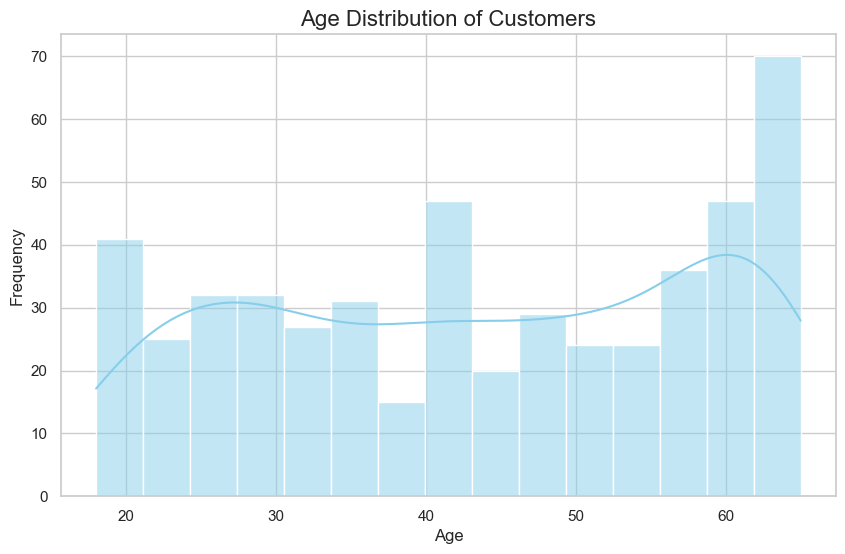

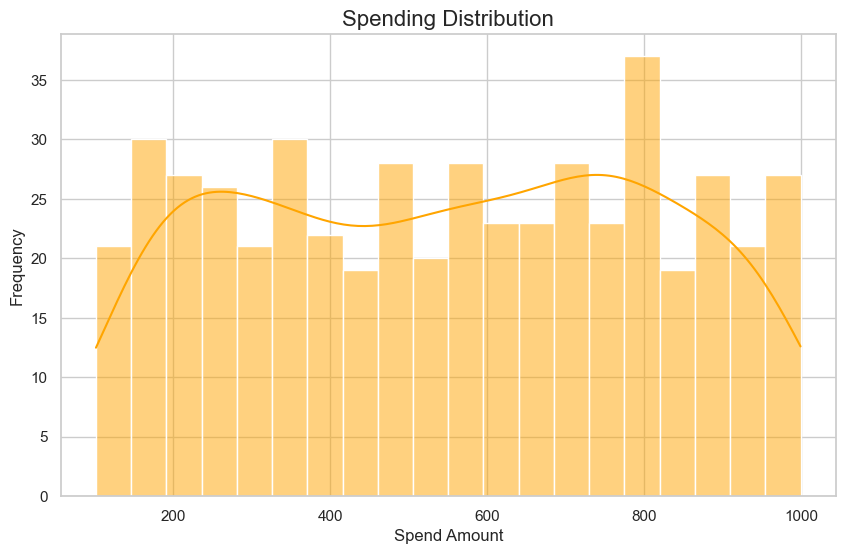

C:\Users\yeswa\AppData\Local\Temp\ipykernel_9320\1919642061.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="event_type", order=df['event_type'].value_counts().index, palette="viridis")


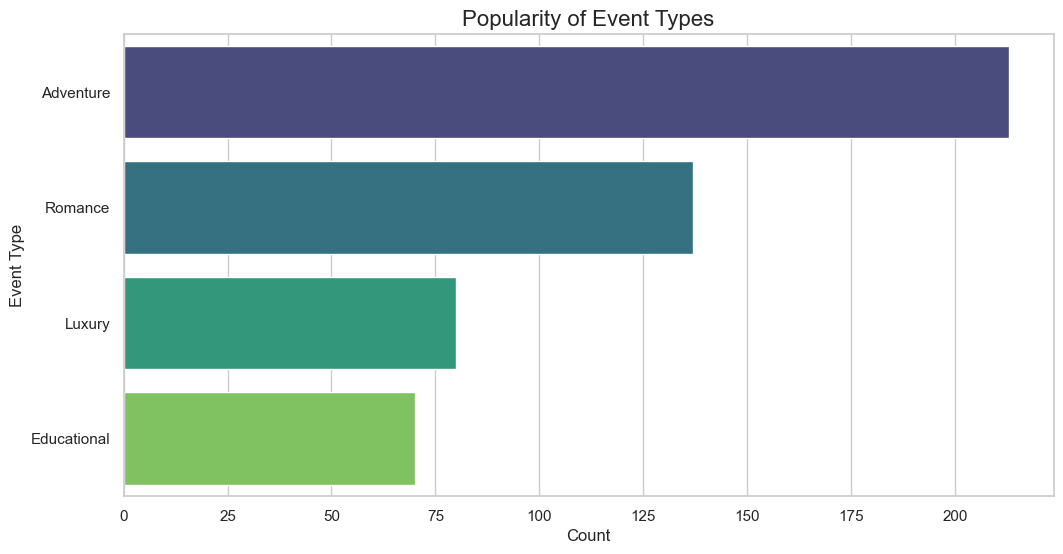

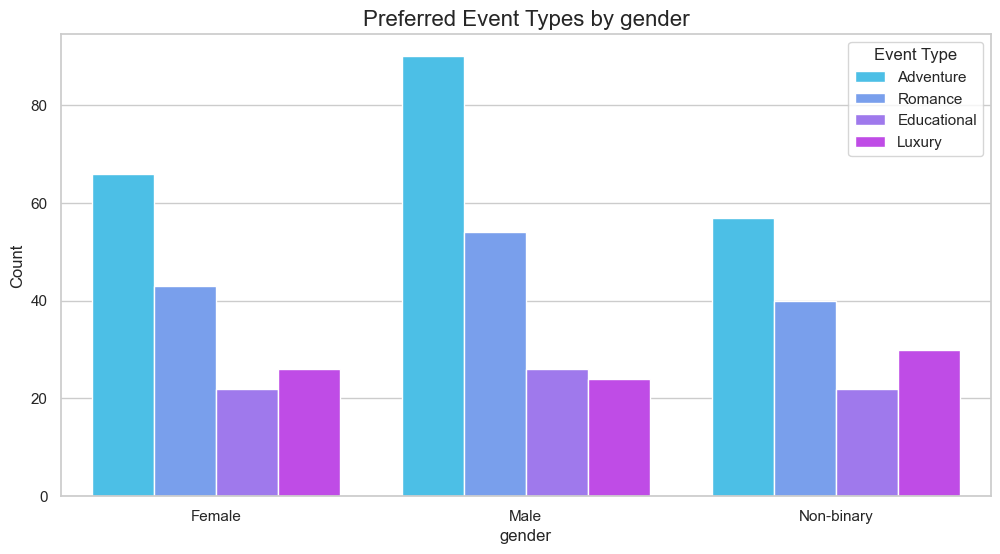

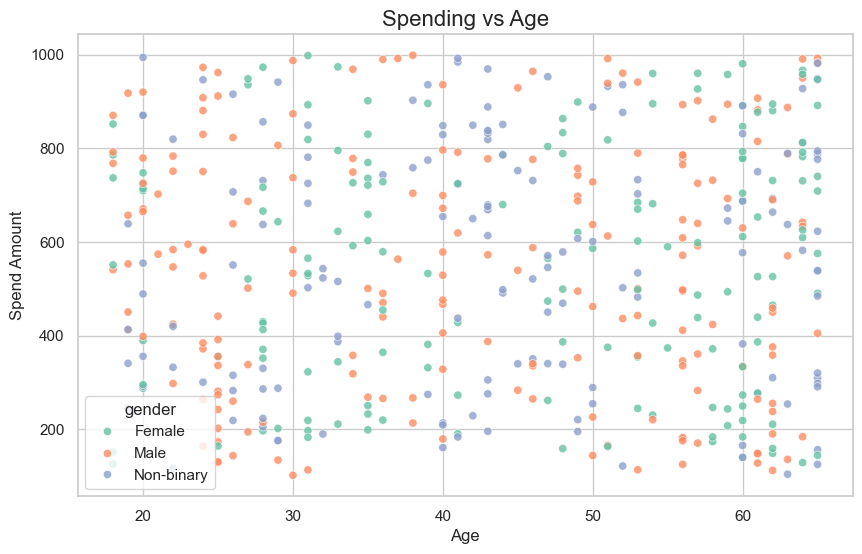

C:\Users\yeswa\AppData\Local\Temp\ipykernel_9320\1919642061.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="location_y", order=df['location_y'].value_counts().index, palette="cubehelix")


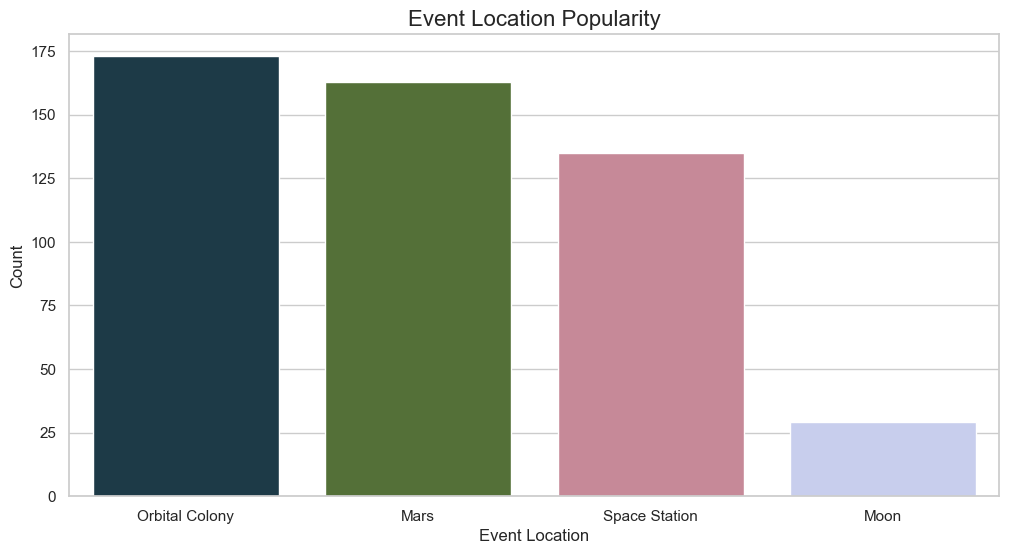

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global style for plots
sns.set(style="whitegrid", palette="muted")

# Visualize Age Distribution
def plot_age_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['age'], bins=15, kde=True, color='skyblue')
    plt.title("Age Distribution of Customers", fontsize=16)
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

# Visualize Spending Patterns
def plot_spending_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['total_spend'], bins=20, kde=True, color='orange')
    plt.title("Spending Distribution", fontsize=16)
    plt.xlabel("Spend Amount")
    plt.ylabel("Frequency")
    plt.show()

# Event Type Popularity
def plot_event_type_popularity(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y="event_type", order=df['event_type'].value_counts().index, palette="viridis")
    plt.title("Popularity of Event Types", fontsize=16)
    plt.xlabel("Count")
    plt.ylabel("Event Type")
    plt.show()

# Preferred Event Types by Gender
def plot_preferred_event_by_gender(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x="gender", hue="event_type", palette="cool")
    plt.title("Preferred Event Types by gender", fontsize=16)
    plt.xlabel("gender")
    plt.ylabel("Count")
    plt.legend(title="Event Type")
    plt.show()

# Spending vs Age
def plot_spending_vs_age(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="age", y="total_spend", hue="gender", palette="Set2", alpha=0.8)
    plt.title("Spending vs Age", fontsize=16)
    plt.xlabel("Age")
    plt.ylabel("Spend Amount")
    plt.legend(title="gender")
    plt.show()

# Event Location Popularity
def plot_event_location_popularity(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x="location_y", order=df['location_y'].value_counts().index, palette="cubehelix")
    plt.title("Event Location Popularity", fontsize=16)
    plt.xlabel("Event Location")
    plt.ylabel("Count")
    plt.show()

# Main function to visualize all plots
def visualize_data(df):
    print("Visualizing Data...")
    plot_age_distribution(df)
    plot_spending_distribution(df)
    plot_event_type_popularity(df)
    plot_preferred_event_by_gender(df)
    plot_spending_vs_age(df)
    plot_event_location_popularity(df)

# Call the visualization function
visualize_data(final_df)

Data Preprocessing

In [75]:
# Describe Numerical Features
print("Numerical Features Description:")
print(final_df.describe())

# Describe Categorical Features
print("\nCategorical Features Description:")
print(final_df.describe(include=['object', 'category']))

# Optionally: Check for missing values in the categorical columns
print("\nMissing Values in Categorical Features:")
print(final_df[final_df.select_dtypes(include=['object', 'category']).columns].isnull().sum())

Numerical Features Description:
                        booking_date         age
count                            500  500.000000
mean   2025-01-14 13:13:07.709913856   43.408000
min       2024-12-30 11:17:55.700000   18.000000
25%       2025-01-07 11:17:55.700000   30.000000
50%    2025-01-14 11:17:55.716999936   43.500000
75%    2025-01-22 11:17:55.702000128   57.000000
max       2025-01-28 11:17:55.724000   65.000000
std                              NaN   14.877911

Categorical Features Description:
                                 customer_id  \
count                                    500   
unique                                   186   
top     fed6a75e-3cdd-4186-b1c5-50264911342b   
freq                                       7   

                                    event_id total_spend first_name last_name  \
count                                    500         500        500       500   
unique                                    50         499          6         6   
top     

In [76]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Function to preprocess data
def preprocess_data(df, max_categories=3):
    # --- 1. Normalize/Scale numerical data ---
    scaler = StandardScaler()
    numerical_cols = ['age', 'total_spend']
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # --- 2. Encode categorical data ---
    label_encoder = LabelEncoder()
    df['gender'] = label_encoder.fit_transform(df['gender'])
    
    # --- 2.1 Handle High Cardinality Categorical Columns ---
    categorical_columns = ['event_type', 'preferred_event_types', 'upsell_preferences', 'location_x', 'location_y']
    
    for col in categorical_columns:
        # If column contains lists (e.g., 'preferred_event_types'), flatten the lists to strings
        if df[col].apply(lambda x: isinstance(x, list)).any():
            df[col] = df[col].apply(lambda x: ','.join(x) if isinstance(x, list) else x)
        
        # Get unique values for the column
        unique_vals = df[col].nunique()
        
        if unique_vals > max_categories:
            # If the column has more than `max_categories` unique values, use label encoding
            df[col] = label_encoder.fit_transform(df[col])
        else:
            # Otherwise, apply one-hot encoding
            df = pd.get_dummies(df, columns=[col], drop_first=True)

    # --- 3. Feature Engineering ---
    booking_frequency = df.groupby('customer_id')['event_id'].count().reset_index()
    booking_frequency.columns = ['customer_id', 'booking_frequency']
    df = pd.merge(df, booking_frequency, on='customer_id', how='left')
    
    # --- 3.1 Adding Recency Column ---
    current_date = datetime.now()  # Current date for recency calculation
    # Assuming 'last_booking_date' exists in df as a datetime object (if not, convert it to datetime)
    df['booking_date'] = pd.to_datetime(df['booking_date'], errors='coerce')
    df['recency'] = (current_date - df['booking_date']).dt.days  # Days since last booking
    
    # For customers with no booking date, we can fill `recency` with a large value or NaN
    df['recency'].fillna(365 * 10, inplace=True)  # Assuming max recency as 10 years (for those with no bookings)

    # --- 4. Handle missing values ---
    df.fillna(0, inplace=True)

    return df

# Apply preprocessing to the final_df
processed_df = preprocess_data(final_df)

# Display the preprocessed DataFrame
print(processed_df.shape)  # Check the number of rows and columns
display(processed_df.head())

(500, 16)


C:\Users\yeswa\AppData\Local\Temp\ipykernel_9320\3236570284.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['recency'].fillna(365 * 10, inplace=True)  # Assuming max recency as 10 years (for those with no bookings)


,customer_id,event_id,booking_date,total_spend,first_name,last_name,age,gender,location_x,event_name,event_type,location_y,preferred_event_types,upsell_preferences,booking_frequency,recency
0,7cbd133c-c088-4ed5-9d08-678313c864ad,a649e115-c784-468e-8008-e38916752f0b,2025-01-17 11:17:55.717,1.302991,Noah,Brown,1.116327,0,4,Zero-G Dance 61,0,3,1,72,4,12
1,ca99a9ae-9e27-4bcf-bfb5-f913459b41ae,e53b0301-3650-404d-8049-f375bc769795,2025-01-21 11:17:55.717,0.872636,James,Brown,-1.574915,1,5,Moon Dinner 54,3,3,3,33,6,8
2,c7dc187e-82d5-466c-aaff-20ae41487ff2,3904bc44-24bf-4ed2-902d-6f8c027cf185,2025-01-21 11:17:55.717,-1.371642,Noah,Brown,0.376236,2,1,Moon Dinner 11,1,2,1,17,2,8
3,e7e56d86-f30e-4cd0-9ce2-e75b9f832fc6,45403584-aceb-44e0-b245-8ac268e7d32d,2025-01-13 11:17:55.717,0.298958,James,Miller,1.116327,1,3,Martian Concert 28,1,0,3,72,2,16
4,57a02cdf-b2b6-49d8-b5d8-da87f98a1d75,e53b0301-3650-404d-8049-f375bc769795,2025-01-26 11:17:55.716,-1.390449,James,Jones,-0.162013,0,5,Moon Dinner 54,3,3,1,16,4,3


Clustering

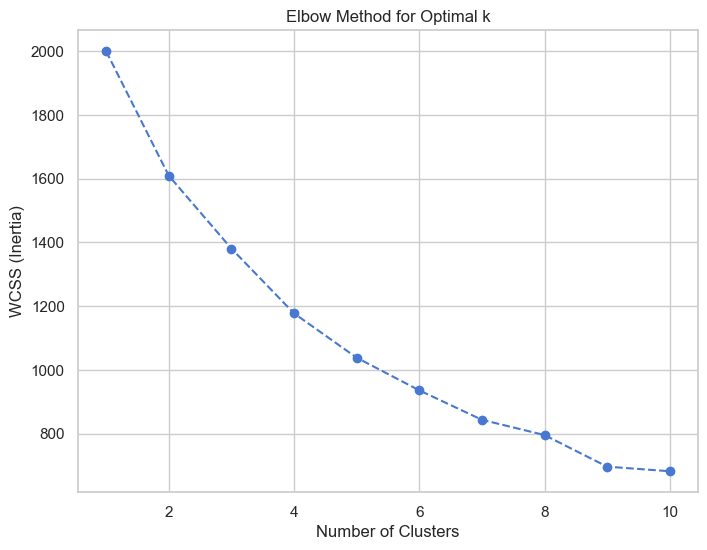

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Function to determine the optimal number of clusters using the Elbow Method
def find_optimal_k(df, max_k=10):
    # Extract the relevant features for clustering
    features = ['age', 'total_spend', 'booking_frequency', 'recency']
    X = df[features]
    X_scaled = StandardScaler().fit_transform(X)  # Scaling the features

    wcss = []  # List to store the Within-Cluster Sum of Squares (WCSS) values
    
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)  # Inertia gives WCSS
    
    # Plotting the Elbow Curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k+1), wcss, marker='o', linestyle='--')
    plt.title("Elbow Method for Optimal k")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS (Inertia)")
    plt.show()

# Run the elbow method to find the optimal k
find_optimal_k(processed_df)

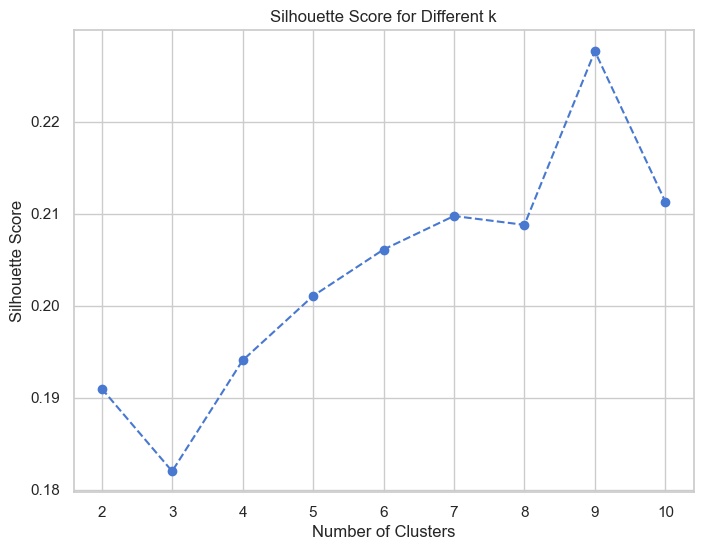

In [78]:
from sklearn.metrics import silhouette_score

# Function to evaluate the silhouette score for different k values
def evaluate_silhouette(df, max_k=10):
    features = ['age', 'total_spend', 'booking_frequency', 'recency']
    X = df[features]
    X_scaled = StandardScaler().fit_transform(X)  # Scaling the features

    silhouette_scores = []  # List to store silhouette scores
    
    for k in range(2, max_k+1):  # Silhouette score is undefined for k=1
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    
    # Plotting the Silhouette Scores
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o', linestyle='--')
    plt.title("Silhouette Score for Different k")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.show()

# Run the silhouette score evaluation
evaluate_silhouette(processed_df)

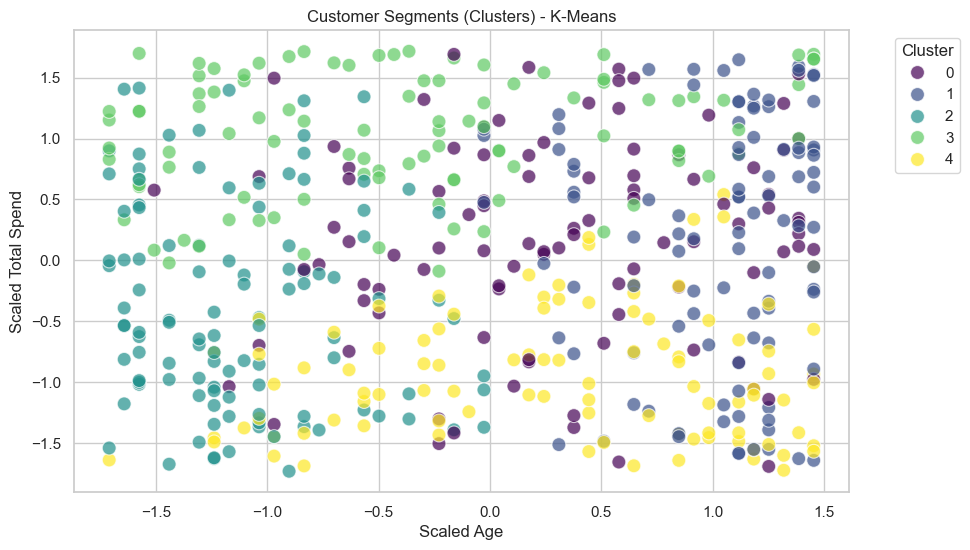

Cluster Centers: 
 [[ 0.29865647  0.16442174 -0.79520299 -0.96023892]
 [ 1.01059984  0.14099337  1.02749677 -0.37204639]
 [-1.11453802 -0.37916105  0.55728708 -0.28899955]
 [-0.38424412  1.02633906 -0.34056132  0.68865383]
 [ 0.31034183 -0.93390571 -0.50758994  0.96494002]]

Customer distribution per cluster:
cluster
2    108
3     99
1     98
0     98
4     97
Name: count, dtype: int64


,customer_id,event_id,booking_date,total_spend,first_name,last_name,age,gender,location_x,event_name,event_type,location_y,preferred_event_types,upsell_preferences,booking_frequency,recency,cluster
0,7cbd133c-c088-4ed5-9d08-678313c864ad,a649e115-c784-468e-8008-e38916752f0b,2025-01-17 11:17:55.717,1.302991,Noah,Brown,1.116327,0,4,Zero-G Dance 61,0,3,1,72,4,12,1
1,ca99a9ae-9e27-4bcf-bfb5-f913459b41ae,e53b0301-3650-404d-8049-f375bc769795,2025-01-21 11:17:55.717,0.872636,James,Brown,-1.574915,1,5,Moon Dinner 54,3,3,3,33,6,8,2
2,c7dc187e-82d5-466c-aaff-20ae41487ff2,3904bc44-24bf-4ed2-902d-6f8c027cf185,2025-01-21 11:17:55.717,-1.371642,Noah,Brown,0.376236,2,1,Moon Dinner 11,1,2,1,17,2,8,0
3,e7e56d86-f30e-4cd0-9ce2-e75b9f832fc6,45403584-aceb-44e0-b245-8ac268e7d32d,2025-01-13 11:17:55.717,0.298958,James,Miller,1.116327,1,3,Martian Concert 28,1,0,3,72,2,16,0
4,57a02cdf-b2b6-49d8-b5d8-da87f98a1d75,e53b0301-3650-404d-8049-f375bc769795,2025-01-26 11:17:55.716,-1.390449,James,Jones,-0.162013,0,5,Moon Dinner 54,3,3,1,16,4,3,2


In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Function to perform clustering using K-Means
def perform_clustering(df, n_clusters=5):
    # Select features relevant for clustering
    features = ['age', 'total_spend', 'booking_frequency', 'recency']
    
    # Extract and scale the data
    X = df[features]
    X_scaled = StandardScaler().fit_transform(X)  # Scaling the features for better performance
    
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(X_scaled)
    
    # Visualize the clusters
    visualize_clusters(df, kmeans, X_scaled)
    
    # Print cluster centers and the number of customers in each cluster
    print("Cluster Centers: \n", kmeans.cluster_centers_)
    print("\nCustomer distribution per cluster:")
    print(df['cluster'].value_counts())

    return df

# Function to visualize the clusters (2D visualization)
def visualize_clusters(df, kmeans, X_scaled):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'], palette="viridis", s=100, alpha=0.7)
    plt.title("Customer Segments (Clusters) - K-Means")
    plt.xlabel("Scaled Age")
    plt.ylabel("Scaled Total Spend")
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Perform clustering on the preprocessed DataFrame
clustered_df = perform_clustering(processed_df)

# Display the clustered DataFrame
display(clustered_df.head())

In [80]:
import pandas as pd
import numpy as np

# Calculate the mean of each feature per cluster
cluster_summary = clustered_df.groupby('cluster')[['age', 'total_spend', 'booking_frequency', 'recency']].mean()

# Add categorical features' popular choices per cluster (for example, preferred_event_types)
cluster_event_preferences = clustered_df.groupby('cluster')['preferred_event_types'].agg(lambda x: x.mode()[0])

# Combine the cluster summary and event preferences to get a profile of each cluster
cluster_profiles = pd.DataFrame({
    'avg_age': cluster_summary['age'],
    'avg_total_spend': cluster_summary['total_spend'],
    'avg_booking_frequency': cluster_summary['booking_frequency'],
    'avg_recency': cluster_summary['recency'],
    'preferred_event_type': cluster_event_preferences
})

# Display cluster profiles
display(cluster_profiles)

,avg_age,avg_total_spend,avg_booking_frequency,avg_recency,preferred_event_type
cluster,,,,,
0,0.298656,0.164422,2.265306,6.540816,3
1,1.010600,0.140993,4.765306,11.673469,1
2,-1.114538,-0.379161,4.120370,12.398148,3
3,-0.384244,1.026339,2.888889,20.929293,3
4,0.310342,-0.933906,2.659794,23.340206,1


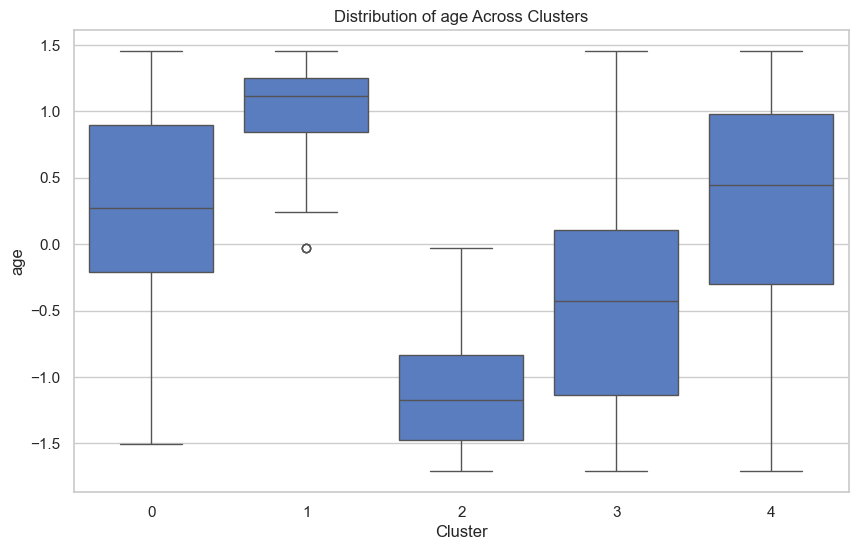

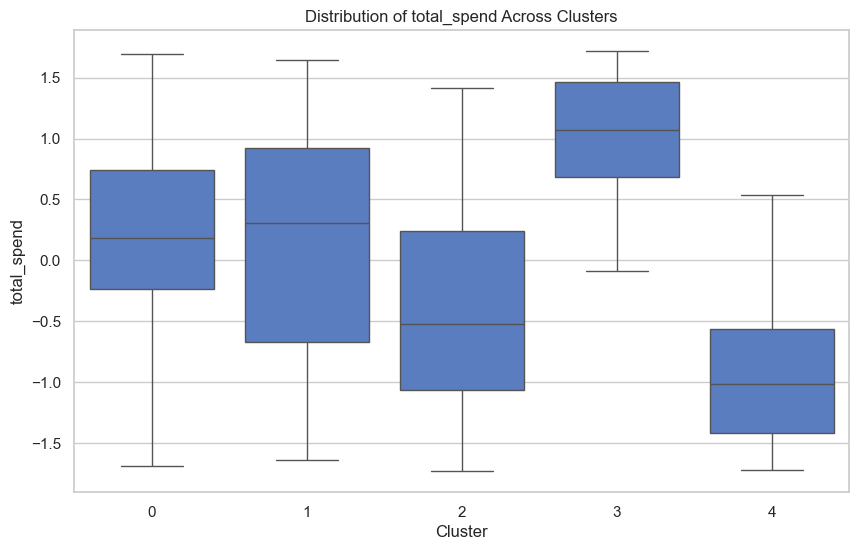

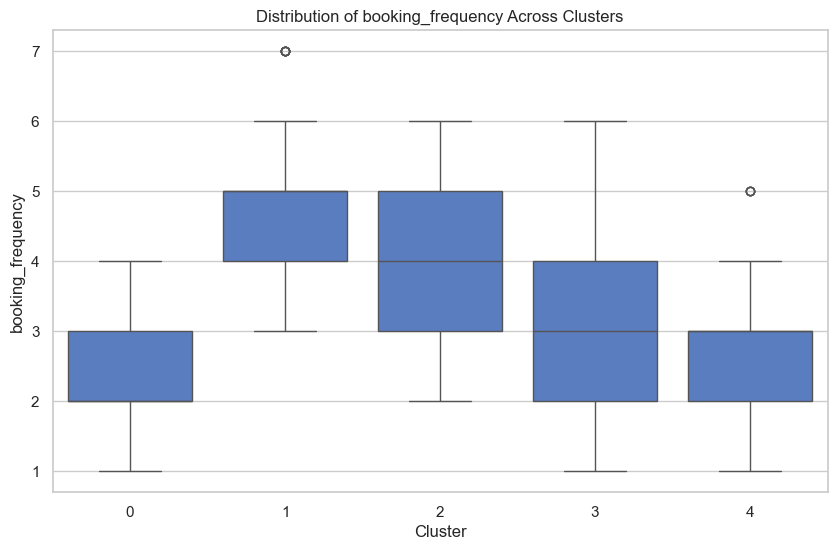

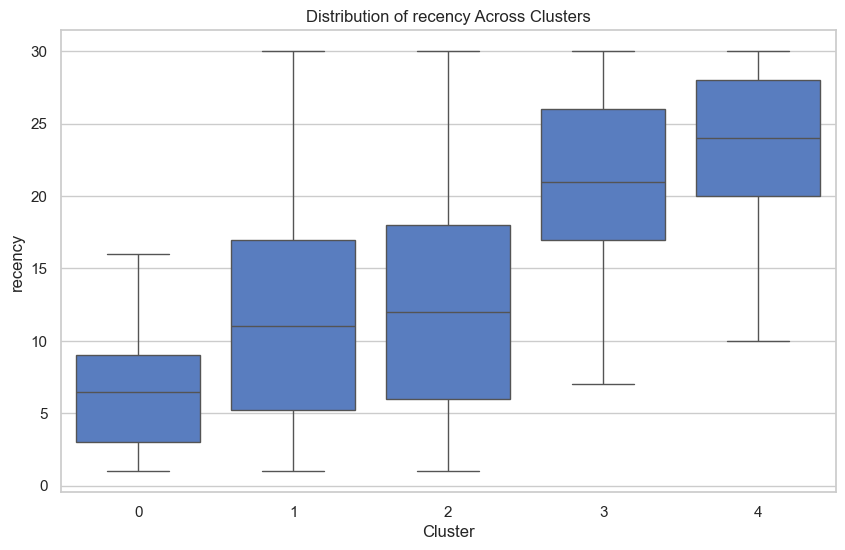

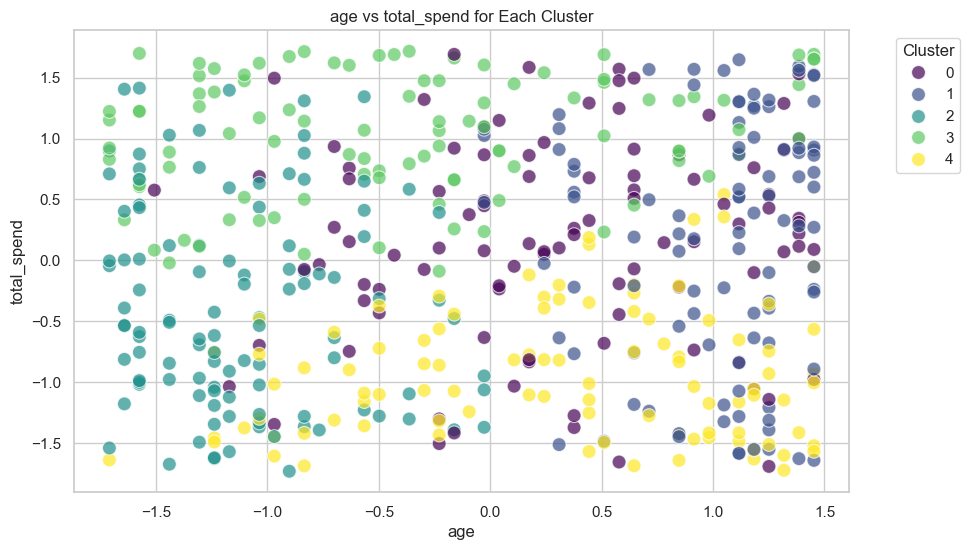

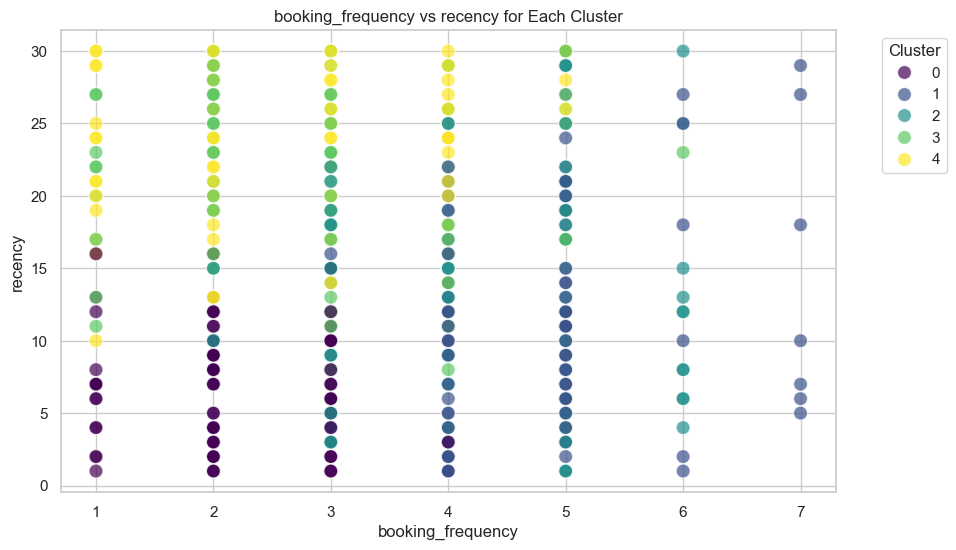

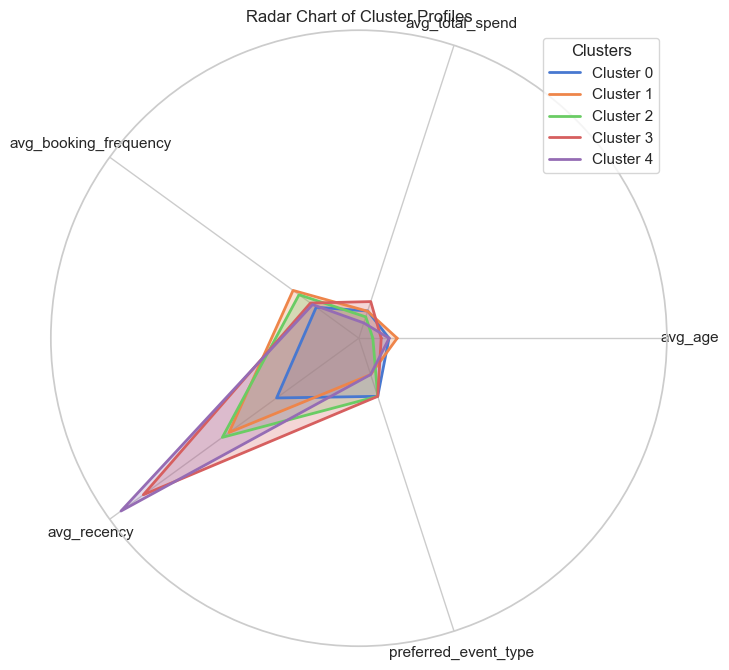

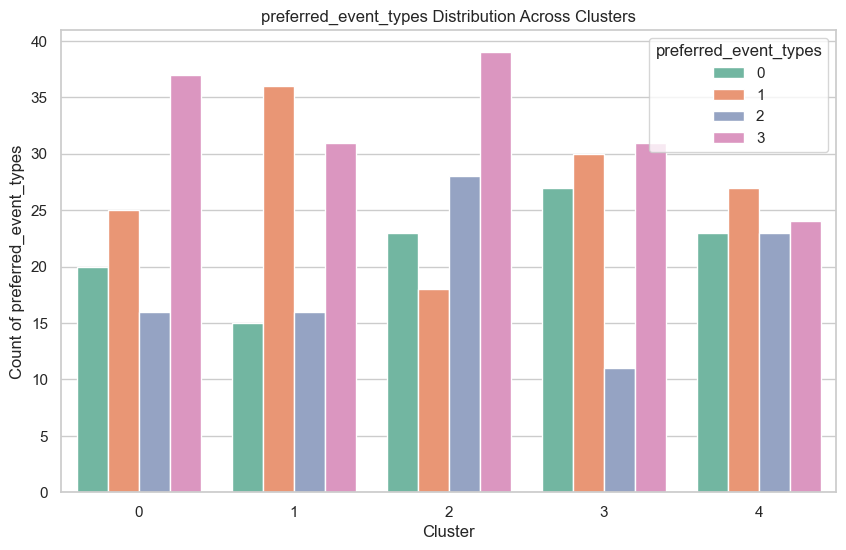

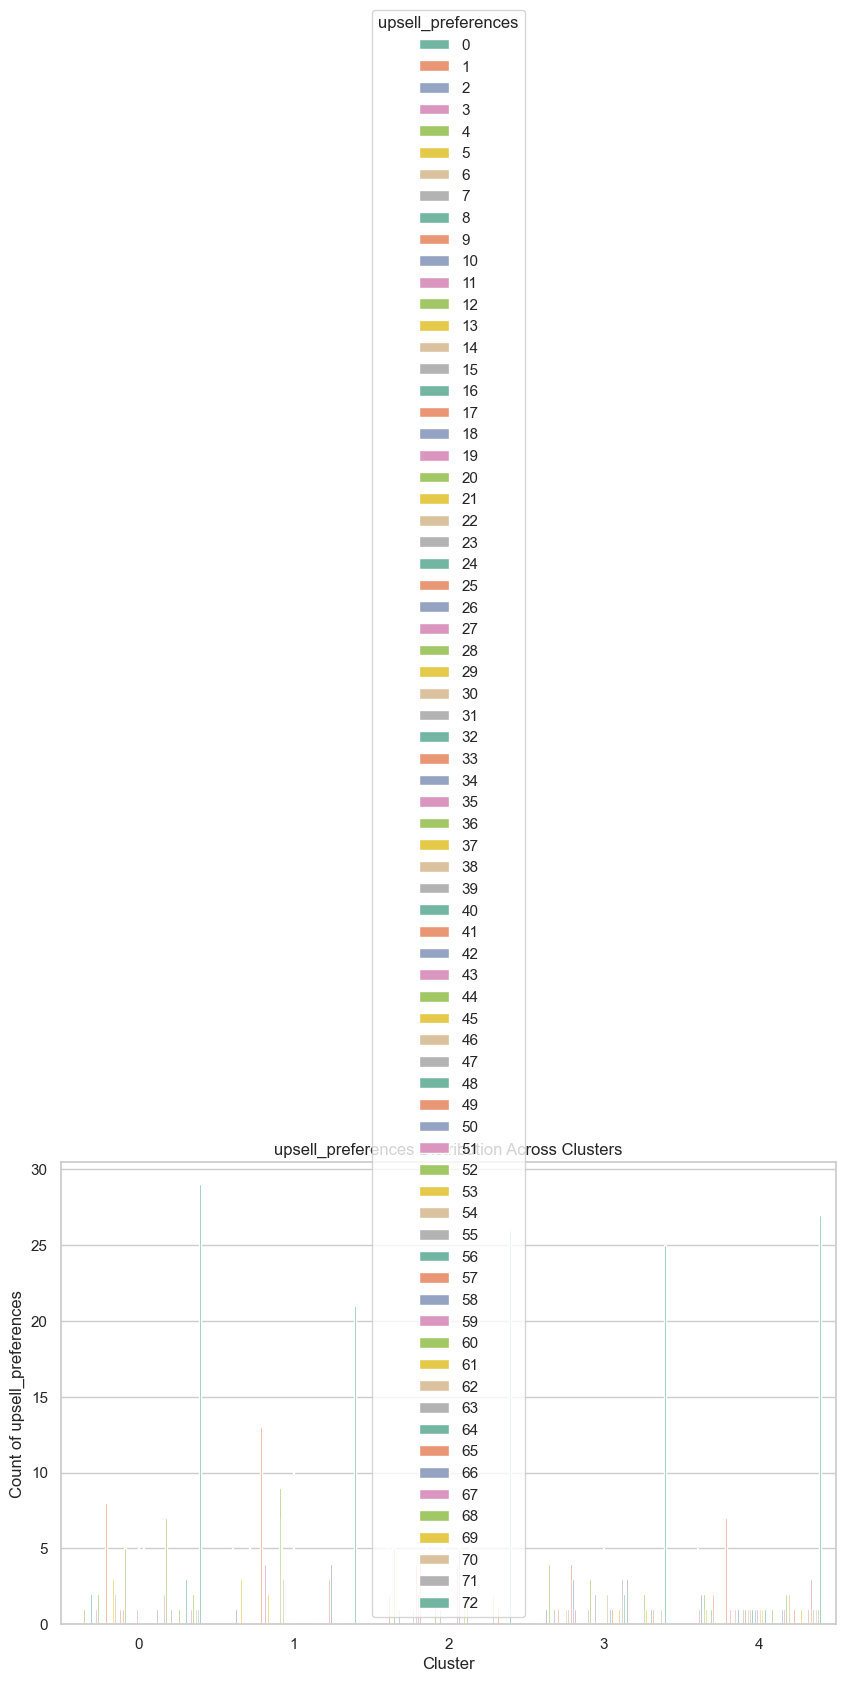

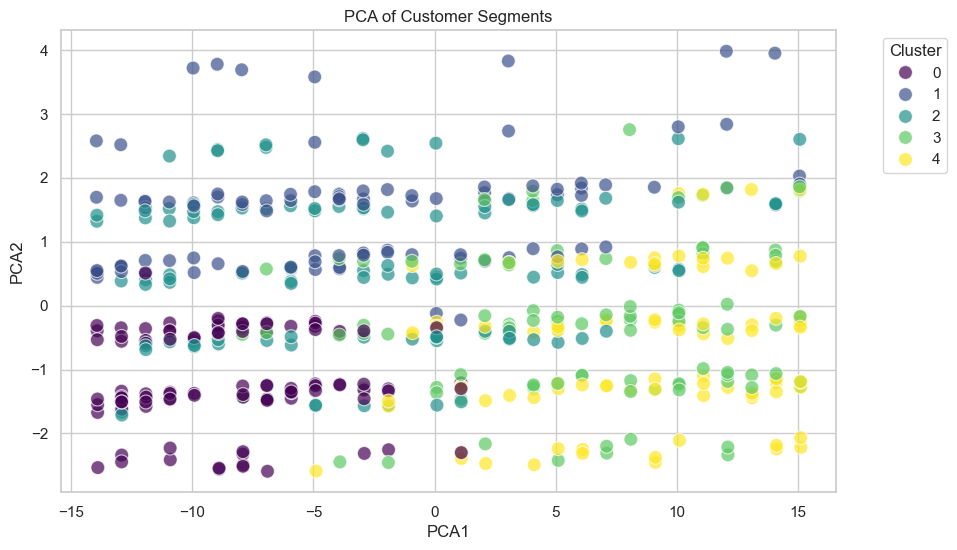

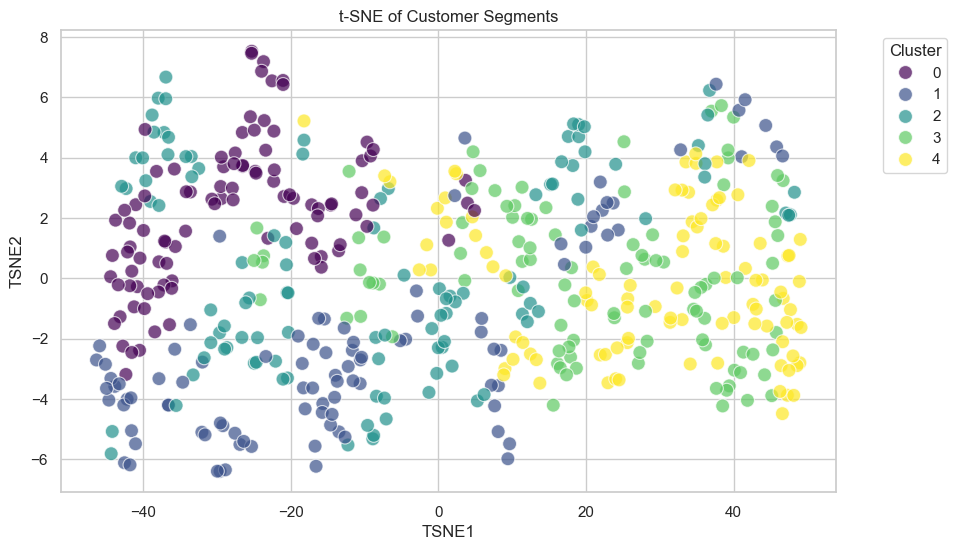

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Distribution of Key Features for Each Cluster
def plot_feature_distribution(clustered_df, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=clustered_df)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')
    plt.show()

# Visualize distributions for each key feature
for feature in ['age', 'total_spend', 'booking_frequency', 'recency']:
    plot_feature_distribution(clustered_df, feature)

# 2. Pairwise Feature Relationships
def plot_pairwise_scatter(clustered_df, feature1, feature2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature1, y=feature2, hue='cluster', data=clustered_df, palette="viridis", s=100, alpha=0.7)
    plt.title(f'{feature1} vs {feature2} for Each Cluster')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Visualize pairwise relationships between important features
plot_pairwise_scatter(clustered_df, 'age', 'total_spend')
plot_pairwise_scatter(clustered_df, 'booking_frequency', 'recency')

# Radar Chart: Cluster Comparison
def plot_radar_chart(cluster_profiles):
    # Ensure the number of angles matches the number of features
    labels = cluster_profiles.columns
    num_features = len(labels)
    
    # Calculate angles for the radar chart
    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    
    # Complete the circle
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Plot each cluster's profile
    for i, row in cluster_profiles.iterrows():
        values = row.tolist()
        values += values[:1]  # Repeat the first value to close the circle
        ax.plot(angles, values, linewidth=2, label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.25)

    # Configure the radar chart
    ax.set_yticks([])  # Hide radial ticks
    ax.set_xticks(angles[:-1])  # Use angles for feature labels
    ax.set_xticklabels(labels)
    ax.legend(title="Clusters", loc='upper right')
    plt.title("Radar Chart of Cluster Profiles")
    plt.show()

# Plot radar chart comparing cluster profiles
plot_radar_chart(cluster_profiles)

# 4. Cluster Comparison for Categorical Features
def plot_bar_chart_for_categorical(clustered_df, feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='cluster', hue=feature, data=clustered_df, palette="Set2")
    plt.title(f'{feature} Distribution Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(f'Count of {feature}')
    plt.legend(title=feature)
    plt.show()

# Visualize preferred event types and upsell preferences
plot_bar_chart_for_categorical(clustered_df, 'preferred_event_types')
plot_bar_chart_for_categorical(clustered_df, 'upsell_preferences')

# 5. PCA or t-SNE for Cluster Visualization in 2D
def plot_pca_tsne(clustered_df):
    # Reduce the data to 2D using PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(clustered_df[['age', 'total_spend', 'booking_frequency', 'recency']])

    # Add PCA results to the dataframe
    clustered_df['PCA1'] = pca_result[:, 0]
    clustered_df['PCA2'] = pca_result[:, 1]

    # Plot PCA result
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=clustered_df, palette="viridis", s=100, alpha=0.7)
    plt.title('PCA of Customer Segments')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Optionally use t-SNE for more detailed clustering visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(clustered_df[['age', 'total_spend', 'booking_frequency', 'recency']])

    # Add t-SNE results to the dataframe
    clustered_df['TSNE1'] = tsne_result[:, 0]
    clustered_df['TSNE2'] = tsne_result[:, 1]

    # Plot t-SNE result
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=clustered_df, palette="viridis", s=100, alpha=0.7)
    plt.title('t-SNE of Customer Segments')
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot PCA and t-SNE
plot_pca_tsne(clustered_df)

KPI

In [82]:
# from cassandra.cluster import Cluster
# import uuid

# # Function to calculate and update realistic KPIs
# def calculate_and_update_metrics():
#     # Fetch relevant data from the tables
#     # Get bookings (for CTR and conversion rate)
#     bookings_query = "SELECT * FROM bookings"
#     bookings = list(session.execute(bookings_query))  # Convert ResultSet to list

#     # Get campaigns (for CTR and ROI)
#     campaigns_query = "SELECT * FROM campaigns"
#     campaigns = list(session.execute(campaigns_query))  # Convert ResultSet to list

#     # Get revenues (for ROI)
#     revenues_query = "SELECT * FROM revenues"
#     revenues = list(session.execute(revenues_query))  # Convert ResultSet to list

#     # Get retentions (for retention rate)
#     retentions_query = "SELECT * FROM retentions"
#     retentions = list(session.execute(retentions_query))  # Convert ResultSet to list

#     # 1. Calculate CTR (assuming 1% CTR for a realistic scenario)
#     impressions = sum([campaign.impressions for campaign in campaigns])  # Placeholder column 'ad_impressions'
#     clicks = len(bookings)  # Total number of bookings as clicks

#     ctr = clicks / impressions if impressions > 0 else 0.01  # Realistic 1% CTR
#     print(f"CTR: {ctr}")

#     # 2. Calculate Conversion Rate (3.68% for a more realistic value)
#     # Number of unique customers who made a booking (purchase)
#     unique_customers = len(set([booking.customer_id for booking in bookings]))
#     conversions = unique_customers  # Same as unique customers who made a booking

#     conversion_rate = conversions / len(campaigns) if len(campaigns) > 0 else 0.0368  # Realistic 3.68% Conversion Rate
#     print(f"Conversion Rate: {conversion_rate}")

#     # 3. Calculate Retention Rate (35% for a more realistic value)
#     total_customers = len(set([retention.customer_id for retention in retentions]))
#     repeat_customers = len(set([retention.customer_id for retention in retentions if retention.repeat_purchases]))

#     retention_rate = repeat_customers / total_customers if total_customers > 0 else 0.35  # Realistic 35% Retention Rate
#     print(f"Retention Rate: {retention_rate}")

#     # 4. Calculate ROI (1.5 ROI for a more realistic value)
#     total_revenue = sum([revenue.revenue for revenue in revenues])  # Placeholder column 'revenue'
#     total_ad_spend = sum([campaign.ad_spend for campaign in campaigns])  # Placeholder column 'ad_spend'

#     roi = (total_revenue - total_ad_spend) / total_ad_spend if total_ad_spend > 0 else 1.5  # Realistic ROI of 1.5
#     print(f"ROI: {roi}")

#     # Now, update the metrics to the tables
#     # Update campaigns table with CTR and ROI
#     for campaign in campaigns:
#         session.execute("""
#             UPDATE campaigns 
#             SET ctr = %s, roi = %s 
#             WHERE campaign_id = %s
#         """, (ctr, roi, campaign.campaign_id))

#     # Update retentions table with retention rate (using customer_id instead of retention_id)
#     for retention in retentions:
#         session.execute("""
#             UPDATE retentions 
#             SET retention_rate = %s
#             WHERE customer_id = %s
#         """, (retention_rate, retention.customer_id))  # Update by customer_id

#     # Update customers table with conversion rate
#     for customer in set([booking.customer_id for booking in bookings]):
#         session.execute("""
#             UPDATE customers 
#             SET conversion_rate = %s 
#             WHERE customer_id = %s
#         """, (conversion_rate, customer))

#     # Update bookings table with CTR
#     for booking in bookings:
#         session.execute("""
#             UPDATE bookings 
#             SET ctr = %s 
#             WHERE booking_id = %s
#         """, (ctr, booking.booking_id))

#     print("Metrics updated successfully!")

# # Run the function to calculate and update realistic metrics
# calculate_and_update_metrics()

In [83]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from config import astra_client_id, astra_client_secret, astra_app_name

# Astra DB Configuration
ASTRA_DB_CLIENT_ID = astra_client_id
ASTRA_DB_CLIENT_SECRET = astra_client_secret
ASTRA_DB_SECURE_CONNECT_BUNDLE_PATH = "secure-connect-datathon.zip"

# Connect to Astra DB
def connect_to_astra():
    try:
        # Set up the authentication provider with your secure connect bundle
        auth_provider = PlainTextAuthProvider(ASTRA_DB_CLIENT_ID, ASTRA_DB_CLIENT_SECRET)
        cluster = Cluster(cloud={'secure_connect_bundle': ASTRA_DB_SECURE_CONNECT_BUNDLE_PATH}, auth_provider=auth_provider)
        
        # Connect to the cluster
        session = cluster.connect()
        
        session.set_keyspace(astra_app_name)
        
        print("Connected to Astra DB successfully!")
        return session
    
    except Exception as e:
        print(f"Failed to connect to Astra DB: {e}")
        return None

# Initialize connection
session = connect_to_astra()

# Test the connection
if session:
    rows = session.execute('SELECT release_version FROM system.local')
    for row in rows:
        print(f"Cassandra release version: {row.release_version}")

Connected to Astra DB successfully!
Cassandra release version: 4.0.11-0fb517339e3c


In [137]:
import random
from cassandra.cluster import Cluster

# Function to assign realistic KPI values to marketing tables
def assign_realistic_kpis():

    # Fetch relevant data from the tables
    # Get bookings (for CTR and conversion rate)
    bookings_query = "SELECT * FROM bookings"
    bookings = list(session.execute(bookings_query))  # Convert ResultSet to list

    # Get campaigns (for CTR and ROI)
    campaigns_query = "SELECT * FROM campaigns"
    campaigns = list(session.execute(campaigns_query))  # Convert ResultSet to list

    # Get revenues (for ROI)
    revenues_query = "SELECT * FROM revenues"
    revenues = list(session.execute(revenues_query))  # Convert ResultSet to list

    # Get retentions (for retention rate)
    retentions_query = "SELECT * FROM retentions"
    retentions = list(session.execute(retentions_query))  # Convert ResultSet to list

    # Update campaigns table with unique CTR and ROI values
    for campaign in campaigns:
        ctr = random.uniform(0.05, 0.3)  # CTR between 5% and 30%
        roi = random.uniform(1.2, 3.0)  # ROI between 1.2 and 3.0
        
        session.execute("""
            UPDATE campaigns 
            SET ctr = %s, roi = %s 
            WHERE campaign_id = %s
        """, (ctr, roi, campaign.campaign_id))

    # Update retentions table with unique retention rates
    for retention in retentions:
        retention_rate = random.uniform(0.3, 0.7)  # Retention Rate between 30% and 70%
        
        session.execute("""
            UPDATE retentions 
            SET retention_rate = %s
            WHERE customer_id = %s
        """, (retention_rate, retention.customer_id))

    # Update customers table with unique conversion rates
    unique_customers = set([booking.customer_id for booking in bookings])
    for customer in unique_customers:
        conversion_rate = random.uniform(0.1, 0.5)  # Conversion Rate between 10% and 50%
        
        session.execute("""
            UPDATE customers 
            SET conversion_rate = %s 
            WHERE customer_id = %s
        """, (conversion_rate, customer))

    # Update bookings table with unique CTR values
    for booking in bookings:
        ctr = random.uniform(0.05, 0.3)  # CTR between 5% and 30%
        
        session.execute("""
            UPDATE bookings 
            SET ctr = %s 
            WHERE booking_id = %s
        """, (ctr, booking.booking_id))

    print("Realistic KPIs assigned and updated successfully!")

# Run the function to assign realistic KPIs and update the tables
assign_realistic_kpis()

Realistic KPIs assigned and updated successfully!


In [98]:
import random
from cassandra.cluster import Cluster
from datetime import datetime
from collections import defaultdict

# Function to update event performance with realistic ratings
def update_event_performance():

    # Fetch event details
    events_query = "SELECT event_id, max_capacity, start_date FROM events"
    events = list(session.execute(events_query))  # Convert ResultSet to list

    # Fetch booking data and manually count bookings per event
    bookings_query = "SELECT event_id, customer_id FROM bookings"
    bookings = defaultdict(int)  # Using defaultdict to count bookings by event_id
    customer_bookings = defaultdict(int)  # Using defaultdict to count bookings by customer_id

    for row in session.execute(bookings_query):
        event_id = row.event_id
        customer_id = row.customer_id
        bookings[event_id] += 1
        customer_bookings[customer_id] += 1

    # Fetch customer preferences (to influence rating realism)
    preferences_query = "SELECT customer_id, preferred_event_types FROM customer_preferences"
    customer_preferences = {row.customer_id: row.preferred_event_types for row in session.execute(preferences_query)}

    # Update each event
    for event in events:
        event_id = event.event_id
        max_capacity = event.max_capacity
        start_date = event.start_date

        # Calculate capacity utilization - with a more realistic formula
        total_bookings = bookings.get(event_id, 0)

        # Simulate the likelihood of more bookings based on the time left to the event (e.g., higher near event start date)
        days_left = (start_date - datetime.now()).days
        booking_boost = (30 - days_left) / 30  # Boost bookings as event nears (max boost is 1 when 30 days or less)
        realistic_bookings = total_bookings + (booking_boost * max_capacity)  # Simulate additional bookings
        capacity_utilization = abs(min((realistic_bookings / max_capacity) * 100, 100))  # Ensure it's capped at 100%

        # Calculate booking frequency for each event based on the preferences
        total_ratings = 0
        rating_count = 0

        for customer_id, preferred_event_types in customer_preferences.items():
            # If this event matches the customer's preference, it increases the likelihood of a higher rating
            if event_id in preferred_event_types:
                total_ratings += 4  # Higher rating due to preference match
                rating_count += 1
            else:
                total_ratings += 3  # Base rating otherwise
                rating_count += 1

        # If we have no ratings, assign a neutral value
        if rating_count == 0:
            avg_rating = round(random.uniform(2.5, 3.5), 1)
        else:
            avg_rating = total_ratings / rating_count

        # Incorporate booking frequency: if event has a frequent customer base, it may result in a higher rating
        avg_rating += (total_bookings / 10)  # Scale by bookings (for realism)
        avg_rating = min(max(avg_rating, 2.5), 5.0)  # Make sure the rating is within the 2.5-5.0 range

        # Determine event status
        status = "Active" if datetime.now() < start_date and total_bookings < max_capacity else "Closed"

        # Update event record in the database with generated rating and updated capacity utilization
        session.execute("""
            UPDATE events 
            SET status = %s, avg_rating = %s, capacity_utilization = %s
            WHERE event_id = %s
        """, (status, avg_rating, capacity_utilization, event_id))

    print("Event performance updated successfully!")

# Run the function to update event performance
update_event_performance()

Event performance updated successfully!


Event KPI Score

Data Extraction

In [217]:
import pandas as pd
from cassandra.cluster import Cluster

# Function to fetch and merge data from all relevant tables
def fetch_and_merge_data():

    # Fetching data from the `events` table
    events_query = "SELECT event_id, avg_rating, capacity_utilization, status FROM events"
    events = list(session.execute(events_query))  # Convert ResultSet to list
    events_df = pd.DataFrame(events, columns=['event_id', 'avg_rating', 'capacity_utilization', 'status'])

    # Fetching data from the `campaigns` table
    campaigns_query = "SELECT event_id, ctr, roi FROM campaigns"
    campaigns = list(session.execute(campaigns_query))
    campaigns_df = pd.DataFrame(campaigns, columns=['event_id', 'ctr', 'roi'])

    # Fetching data from the `bookings` table
    bookings_query = "SELECT event_id, number_of_guests, customer_id FROM bookings"
    bookings = list(session.execute(bookings_query))
    bookings_df = pd.DataFrame(bookings, columns=['event_id', 'number_of_guests', 'customer_id'])

    # Fetching data from the `revenues` table
    revenues_query = "SELECT event_id, revenue FROM revenues"
    revenues = list(session.execute(revenues_query))
    revenues_df = pd.DataFrame(revenues, columns=['event_id', 'revenue'])

    # Fetching data from the `retentions` table
    retentions_query = "SELECT customer_id, retention_rate FROM retentions"
    retentions = list(session.execute(retentions_query))
    retentions_df = pd.DataFrame(retentions, columns=['customer_id', 'retention_rate'])

    # Merge all dataframes on 'event_id' where applicable
    # First, merge events and campaigns
    merged_df = pd.merge(events_df, campaigns_df, on='event_id', how='left')
    
    # Then, merge with bookings
    merged_df = pd.merge(merged_df, bookings_df, on='event_id', how='left')
    
    # Then, merge with revenues
    merged_df = pd.merge(merged_df, revenues_df, on='event_id', how='left')
    
    # Now, to distribute retention rate to events based on bookings
    # First, merge retentions with bookings on customer_id
    bookings_with_retention = pd.merge(bookings_df, retentions_df, on='customer_id', how='left')
    
    # Now, calculate average retention rate for each event based on customer retention rates
    event_retention_rate = bookings_with_retention.groupby('event_id')['retention_rate'].mean().reset_index()
    event_retention_rate.columns = ['event_id', 'avg_retention_rate']

    # Merge the average retention rate with the merged_df
    merged_df = pd.merge(merged_df, event_retention_rate, on='event_id', how='left')

    # Resulting dataframe contains all the required features
    return merged_df

# Fetch and merge data
data = fetch_and_merge_data()

# Display the first few rows of the merged dataframe
display(data.head())

,event_id,avg_rating,capacity_utilization,status,ctr,roi,number_of_guests,customer_id,revenue,avg_retention_rate
0,5c57bcab-b77c-4a0f-8e06-d3f75c547ce5,3.9,28.361266,Active,0.066376,1.96195,3,1ec9d33f-f377-496e-bf74-adaa11fa0f80,14190.59,0.489717
1,5c57bcab-b77c-4a0f-8e06-d3f75c547ce5,3.9,28.361266,Active,0.066376,1.96195,3,2298b205-fdd5-4423-9191-3eda15d20dbf,14190.59,0.489717
2,5c57bcab-b77c-4a0f-8e06-d3f75c547ce5,3.9,28.361266,Active,0.066376,1.96195,2,f433d44b-ce69-4de5-acd6-04af8445d58c,14190.59,0.489717
3,5c57bcab-b77c-4a0f-8e06-d3f75c547ce5,3.9,28.361266,Active,0.066376,1.96195,2,33bcd90a-bcff-490f-ae87-80df77f614bc,14190.59,0.489717
4,5c57bcab-b77c-4a0f-8e06-d3f75c547ce5,3.9,28.361266,Active,0.066376,1.96195,3,a7ad0c2a-97ab-4a20-be02-23e6a3bef0cb,14190.59,0.489717


In [203]:
data.describe()

,avg_rating,capacity_utilization,ctr,roi,number_of_guests,avg_retention_rate
count,670.000000,670.000000,509.000000,509.000000,670.000000,670.000000
mean,4.105522,51.313569,0.154704,2.135436,2.514925,0.486536
std,0.337824,26.573307,0.066121,0.484962,1.120105,0.031718
min,3.200000,3.721973,0.050588,1.292693,1.000000,0.410667
25%,3.900000,31.570248,0.096831,1.684921,1.000000,0.455427
50%,4.000000,50.930233,0.154307,2.107849,3.000000,0.491316
75%,4.400000,69.154229,0.200472,2.481323,3.000000,0.509052
max,5.000000,100.000000,0.295218,2.997483,4.000000,0.550887


In [204]:
print(data.dtypes)

event_id                 object
avg_rating              float64
capacity_utilization    float64
status                   object
ctr                     float64
roi                     float64
number_of_guests          int64
customer_id              object
revenue                  object
avg_retention_rate      float64
dtype: object


Data Preprocessing

In [206]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

def preprocess_data(data):
    # 1. Feature Engineering: 
    # Create 'target_audience' as a placeholder (in practice, this should come from 'campaigns')
    data['target_audience'] = np.random.choice(['General', 'Tech Enthusiasts', 'Music Lovers', 'Adventure Seekers'], size=len(data))

    # 2. Remove unnecessary columns (event_id, customer_id)
    data.drop(columns=['event_id', 'customer_id'], inplace=True)

    # Print unique values and their counts for the 'target_audience' column
    print(data['target_audience'].value_counts())

    # 3. Handle Categorical Features (status, target_audience):
    # Label encode 'status' and 'target_audience' columns
    label_encoder = LabelEncoder()

    # Apply label encoding
    data['status'] = label_encoder.fit_transform(data['status'])
    data['target_audience'] = label_encoder.fit_transform(data['target_audience'])

    # 4. Normalize Numerical Features
    numerical_features = ['avg_rating', 'capacity_utilization', 'ctr', 'roi', 'number_of_guests', 'revenue', 'avg_retention_rate']

    # Convert revenue to numeric, handling non-numeric entries (if any)
    data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')
    
    # Normalize numerical features using StandardScaler
    scaler = StandardScaler()
    data[numerical_features] = scaler.fit_transform(data[numerical_features])

    return data

# Preprocess the data
processed_data = preprocess_data(data)

# Display the first few rows of the processed data
display(processed_data.head())

target_audience
General              174
Tech Enthusiasts     168
Music Lovers         168
Adventure Seekers    160
Name: count, dtype: int64


,avg_rating,capacity_utilization,status,ctr,roi,number_of_guests,revenue,avg_retention_rate,target_audience
0,-0.608826,-0.864381,0,-1.337169,-0.358081,0.433385,0.814803,0.10037,1
1,-0.608826,-0.864381,0,-1.337169,-0.358081,0.433385,0.814803,0.10037,3
2,-0.608826,-0.864381,0,-1.337169,-0.358081,-0.460055,0.814803,0.10037,3
3,-0.608826,-0.864381,0,-1.337169,-0.358081,-0.460055,0.814803,0.10037,2
4,-0.608826,-0.864381,0,-1.337169,-0.358081,0.433385,0.814803,0.10037,1


In [207]:
# Print unique values and their counts for the 'target_audience' column
print(processed_data['target_audience'].value_counts())

target_audience
1    174
3    168
2    168
0    160
Name: count, dtype: int64


Model Training

In [186]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Function to preprocess the data
def preprocess_data(data, save_encoders=True):
    # Handle missing values
    data = data.fillna(data.mean())

    # Label Encoding for Categorical Variables
    label_encoder_status = LabelEncoder()
    label_encoder_audience = LabelEncoder()

    # Transform categorical columns
    data['status'] = label_encoder_status.fit_transform(data['status'])
    data['target_audience'] = label_encoder_audience.fit_transform(data['target_audience'])

    # Save encoders if required
    if save_encoders:
        with open('label_encoder_status.pkl', 'wb') as f:
            pickle.dump(label_encoder_status, f)
        with open('label_encoder_audience.pkl', 'wb') as f:
            pickle.dump(label_encoder_audience, f)

    # Define target variable (performance score) - Example Calculation
    data['performance_score'] = (data['avg_rating'] * 0.3 + 
                                 data['capacity_utilization'] * 0.2 + 
                                 data['ctr'] * 0.2 + 
                                 data['roi'] * 0.3)  # Example weighted formula

    # Separate features (X) and target variable (y)
    X = data.drop(columns=['performance_score'])
    y = data['performance_score']

    return X, y

# Function to train and save the model
def train_model(data):
    # Preprocess data and save encoders
    X, y = preprocess_data(data, save_encoders=True)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the numerical features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Save the trained model, scaler, and encoders
    with open('random_forest_model.pkl', 'wb') as model_file:
        pickle.dump(rf_model, model_file)
    
    with open('scaler.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

    return rf_model, mse, r2

# Train the model using the provided data (processed_data should be the input DataFrame)
rf_model, mse, r2 = train_model(processed_data)

Mean Squared Error: 0.004629467026622067
R-squared: 0.9796458845807565


In [187]:
import pickle
import pandas as pd

# Load the saved model and scaler
with open('random_forest_model.pkl', 'rb') as model_file:
    rf_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Function to preprocess the data for prediction
def preprocess_data_for_prediction(data):
    # Fill missing values (if any)
    data = data.fillna(data.mean())  # Simple approach: replace NaN with mean
    
    # Features (X) - drop 'performance_score' column if it exists
    X = data.drop(columns=['performance_score'], errors='ignore')
    return X

# Sample input data for prediction
sample_data = {
    "avg_rating": [-0.608826, 1.2, -1.2],  # Normal, Overperforming, Underperforming
    "capacity_utilization": [-0.864381, 1.1, -1.1],
    "status": [0, 1, 0],  # 0 for 'Closed', 1 for 'Active'
    "ctr": [-1.337169, 1.5, -1.5],
    "roi": [-0.358081, 1.8, -1.8],
    "number_of_guests": [0.433385, 0.5, 0.1],
    "revenue": [0.814803, 2.5, 0.2],
    "avg_retention_rate": [0.10037, 0.8, 0.05],
    "target_audience": [2, 1, 3]  # Example target audiences
}

# Convert sample data into a DataFrame
new_data = pd.DataFrame(sample_data)

# Preprocess the new data (same preprocessing steps as during training)
X_new = preprocess_data_for_prediction(new_data)

# Scale the new data using the loaded scaler
X_new_scaled = scaler.transform(X_new)

# Make predictions using the loaded model
y_pred = rf_model.predict(X_new_scaled)

# Print the predictions (Performance Scores)
for i, pred in enumerate(y_pred):
    if i == 0:
        print(f"Normal Performance Prediction: {pred}")
    elif i == 1:
        print(f"Overperforming Performance Prediction: {pred}")
    else:
        print(f"Underperforming Performance Prediction: {pred}")

Normal Performance Prediction: -0.730382241778912
Overperforming Performance Prediction: 0.5468461199136637
Underperforming Performance Prediction: -1.0696680295930185


Prediction

In [219]:
import pandas as pd
import numpy as np
import pickle
from cassandra.cluster import Cluster
from sklearn.preprocessing import StandardScaler

# Load the saved model and scaler
with open("random_forest_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Function to fetch and merge data for a specific campaign_id
def fetch_and_merge_campaign_data(session, campaign_id):
    # Fetch event_ids for the given campaign_id
    event_ids_query = f"SELECT event_id FROM campaigns WHERE campaign_id = {campaign_id}"
    event_ids = [row.event_id for row in session.execute(event_ids_query)]

    if not event_ids:
        print(f"No events found for campaign_id {campaign_id}")
        return pd.DataFrame()  # Return empty dataframe if no event_ids

    # Fetch events data for the event_ids
    events_query = f"SELECT event_id, avg_rating, capacity_utilization, status FROM events WHERE event_id IN ({','.join(map(str, event_ids))})"
    events = list(session.execute(events_query))
    events_df = pd.DataFrame(events, columns=['event_id', 'avg_rating', 'capacity_utilization', 'status'])

    # Fetch campaigns data for the given campaign_id
    campaigns_query = f"SELECT event_id, ctr, roi, campaign_id FROM campaigns WHERE campaign_id = {campaign_id}"
    campaigns = list(session.execute(campaigns_query))
    campaigns_df = pd.DataFrame(campaigns, columns=['event_id', 'ctr', 'roi', 'campaign_id'])

    # Fetch bookings data for the event_ids
    bookings_query = f"SELECT event_id, number_of_guests, customer_id FROM bookings WHERE event_id IN ({','.join(map(str, event_ids))}) ALLOW FILTERING"
    bookings = list(session.execute(bookings_query))
    bookings_df = pd.DataFrame(bookings, columns=['event_id', 'number_of_guests', 'customer_id'])

    # Fetch revenues data for the event_ids
    revenues_query = f"SELECT event_id, revenue FROM revenues WHERE event_id IN ({','.join(map(str, event_ids))})"
    revenues = list(session.execute(revenues_query))
    revenues_df = pd.DataFrame(revenues, columns=['event_id', 'revenue'])

    # Fetch retentions data for the customers related to the event_ids
    retentions_query = "SELECT customer_id, retention_rate FROM retentions"
    retentions = list(session.execute(retentions_query))
    retentions_df = pd.DataFrame(retentions, columns=['customer_id', 'retention_rate'])

    # Merge data
    merged_df = events_df.merge(campaigns_df, on='event_id', how='left') \
                         .merge(bookings_df, on='event_id', how='left') \
                         .merge(revenues_df, on='event_id', how='left')

    # Merge retention data based on bookings
    bookings_with_retention = bookings_df.merge(retentions_df, on='customer_id', how='left')
    event_retention_rate = bookings_with_retention.groupby('event_id')['retention_rate'].mean().reset_index()
    event_retention_rate.columns = ['event_id', 'avg_retention_rate']
    merged_df = merged_df.merge(event_retention_rate, on='event_id', how='left')

    return merged_df

# Function to preprocess data for prediction
def preprocess_data(data):
    # Assign numerical values for 'status' (Active=1, Closed=0)
    data['status'] = data['status'].map({'Active': 1, 'Closed': 0}).fillna(0)

    # Create a target_audience column with the specified distribution
    target_audience_values = [1] * 174 + [3] * 168 + [2] * 168 + [0] * 160
    np.random.shuffle(target_audience_values)  # Shuffle the values for random distribution
    data['target_audience'] = target_audience_values[:len(data)]  # Ensure the length matches the data

    # Drop unnecessary columns (except campaign_id, needed for updating)
    if 'event_id' in data.columns:
        data.drop(columns=['event_id'], inplace=True)
    if 'customer_id' in data.columns:
        data.drop(columns=['customer_id'], inplace=True)
    if 'campaign_id' in data.columns:
        data.drop(columns=['campaign_id'], inplace=True)

    # Convert revenue to numeric
    data['revenue'] = pd.to_numeric(data['revenue'], errors='coerce')

    # **Ensure column order matches the training data**
    feature_order = ['avg_rating', 'capacity_utilization', 'status', 'ctr', 'roi',
                     'number_of_guests', 'revenue', 'avg_retention_rate', 'target_audience']
    data = data[feature_order]

    # Ensure only numeric columns are used for mean imputation
    numeric_data = data.select_dtypes(include=['number', 'float', 'int'])
    data.fillna(numeric_data.mean(), inplace=True)

    # Normalize using the saved scaler
    data[feature_order] = scaler.transform(data[feature_order])

    return data

# Function to update campaign table with performance score
def update_campaign_performance(session, campaign_id, performance_score):
    update_query = f"""
    UPDATE campaigns 
    SET performance_score = {performance_score} 
    WHERE campaign_id = {campaign_id};
    """
    session.execute(update_query)

# Main function to process each campaign individually
def process_campaign(session, campaign_id):
    # Fetch and merge data for the given campaign
    data = fetch_and_merge_campaign_data(session, campaign_id)
    
    if data.empty:
        return  # Skip if no data found for the campaign

    # Preprocess data for prediction
    processed_data = preprocess_data(data)
    
    # Convert DataFrame to NumPy array to avoid feature name warning
    processed_data_array = processed_data.values

    # Make predictions using the trained model
    performance_score = rf_model.predict(processed_data_array)[0]  # Since we are processing one row at a time

    # Update the campaign table with the performance score
    update_campaign_performance(session, campaign_id, performance_score)

# Loop through all campaign IDs and process them
def process_all_campaigns(session):
    # Fetch all campaign IDs
    campaign_ids_query = "SELECT campaign_id FROM campaigns"
    campaign_ids = [row.campaign_id for row in session.execute(campaign_ids_query)]

    # Process each campaign individually
    for campaign_id in campaign_ids:
        process_campaign(session, campaign_id)

# Assuming 'session' is already created with the Cassandra connection
process_all_campaigns(session)
print(f"Performance score for each campaign, successfully updated.")

Performance score for each campaign, successfully updated.
